In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 20)

In [137]:
# Get footywire match data with a row for each player
df_footywire_data = pd.read_csv(r'inputs/footywire_player_matches.csv', index_col=0)
df_footywire_data = df_footywire_data.drop_duplicates()
df_footywire_data

,Date,Season,Round,Venue,Player,Team,Opposition,Status,Match_id,CP,UP,ED,DE,CM,GA,MI5,One.Percenters,BO,TOG,K,HB,D,M,G,B,T,HO,GA1,I50,CL,CG,R50,FF,FA,AF,SC,CCL,SCL,SI,MG,TO,ITC,T5
1,2010-03-25,2010,Round 1,MCG,Daniel Connors,Richmond,Carlton,Home,5089,8,15,16,66.7,0,0,0,1,0,69,14,10,24,3,0,0,1,0,0,2,2,4,6,2,0,77,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-25,2010,Round 1,MCG,Daniel Jackson,Richmond,Carlton,Home,5089,11,10,14,60.9,1,0,0,0,0,80,11,12,23,2,0,0,5,0,0,8,5,4,1,2,0,85,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-03-25,2010,Round 1,MCG,Brett Deledio,Richmond,Carlton,Home,5089,7,14,16,76.2,0,0,0,0,0,89,12,9,21,5,1,0,6,0,0,4,3,4,3,1,2,94,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-03-25,2010,Round 1,MCG,Ben Cousins,Richmond,Carlton,Home,5089,9,10,11,57.9,0,1,0,0,0,69,13,6,19,1,1,0,1,0,1,1,2,3,4,1,0,65,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-03-25,2010,Round 1,MCG,Trent Cotchin,Richmond,Carlton,Home,5089,8,10,13,68.4,1,0,0,0,1,77,11,8,19,6,0,0,1,0,0,2,3,3,2,0,2,65,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90416,2019-09-28,2019,Grand Final,MCG,Harrison Himmelberg,GWS,Richmond,Away,9927,3,9,7,58.3,1,0,2,4,0,92,9,3,12,7,1,1,1,2,0,2,0,3,0,1,1,65,51,0.0,0.0,3.0,153.0,4.0,2.0,1.0
90417,2019-09-28,2019,Grand Final,MCG,Samuel Reid,GWS,Richmond,Away,9927,5,6,8,66.7,0,0,0,4,0,96,5,7,12,2,0,0,3,0,0,0,1,2,1,0,0,47,55,0.0,1.0,1.0,97.0,2.0,5.0,0.0
90418,2019-09-28,2019,Grand Final,MCG,Adam Kennedy,GWS,Richmond,Away,9927,4,8,9,81.8,0,0,0,1,0,71,5,6,11,4,0,0,4,0,0,2,1,0,0,1,0,56,55,0.0,1.0,1.0,121.0,0.0,5.0,1.0
90419,2019-09-28,2019,Grand Final,MCG,Shane Mumford,GWS,Richmond,Away,9927,8,2,7,70.0,0,0,0,4,0,75,2,8,10,0,0,0,1,15,0,1,2,2,1,1,0,42,62,1.0,1.0,0.0,0.0,1.0,2.0,0.0


In [138]:
# Create a summary to get the total SC and AF points for each match
df_match_summary = pd.pivot_table(df_footywire_data, index=['Match_id'], values=['SC', 'AF'], columns=['Status'], aggfunc=np.sum)
df_match_summary = df_match_summary.reset_index()
df_match_summary.columns = df_match_summary.columns.to_series().str.join('_')
df_match_summary = df_match_summary.rename(columns={'Match_id_': 'Match_id'})
df_match_summary

,Match_id,AF_Away,AF_Home,SC_Away,SC_Home
0,4961,1411,1610,1656,1661
1,4962,1393,1713,1359,1944
2,4963,1452,1900,1332,1973
3,4964,1699,1364,1776,1534
4,4965,1643,1503,1742,1556
...,...,...,...,...,...
2032,9923,1363,1544,1495,1802
2033,9924,1338,1415,1622,1678
2034,9925,1492,1385,1680,1616
2035,9926,1518,1580,1657,1641


In [139]:
# get footywire match data with a single row for each match
df_footywire_matches = pd.read_csv(r'Inputs/footywire_team_matches.csv', index_col=0)
df_footywire_matches

,year,date,venue,crowd,match_id,home_team,away_team,home_team_score,away_team_score
0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Richmond,Carlton,64,120
1,2010,Fri 26 Mar 7:40pm,MCG,57772,5090,Geelong,Essendon,125,94
2,2010,Sat 27 Mar 2:10pm,MCG,45615,5091,Melbourne,Hawthorn,61,117
3,2010,Sat 27 Mar 7:10pm,ANZ Stadium,31330,5093,Sydney,St Kilda,88,96
4,2010,Sat 27 Mar 7:30pm,Gabba,29201,5092,Brisbane,West Coast,114,82
...,...,...,...,...,...,...,...,...,...
202,2019,Fri 13 Sep 7:50pm,MCG,51813,9923,Geelong,West Coast,88,68
203,2019,Sat 14 Sep 7:25pm,Gabba,30034,9924,Brisbane,GWS,80,83
204,2019,Fri 20 Sep 7:50pm,MCG,94423,9925,Richmond,Geelong,85,66
205,2019,Sat 21 Sep 4:35pm,MCG,77828,9926,Collingwood,GWS,52,56


In [140]:
# Merge the fantasy summary and the match scores
df_match_fantasy_summary = pd.merge(df_footywire_matches, df_match_summary,how='left', left_on='match_id', right_on='Match_id')
# Drop bye and cancelled games
df_match_fantasy_summary = df_match_fantasy_summary.drop(df_match_fantasy_summary.loc[df_match_fantasy_summary['venue'] == "BYE"].index)
df_match_fantasy_summary = df_match_fantasy_summary.drop(df_match_fantasy_summary.loc[df_match_fantasy_summary['venue'] == "MATCH CANCELLED"].index)
df_match_fantasy_summary

,year,date,venue,crowd,match_id,home_team,away_team,home_team_score,away_team_score,Match_id,AF_Away,AF_Home,SC_Away,SC_Home
0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Richmond,Carlton,64,120,5089,1938,1250,1986,1321
1,2010,Fri 26 Mar 7:40pm,MCG,57772,5090,Geelong,Essendon,125,94,5090,1503,1774,1523,1775
2,2010,Sat 27 Mar 2:10pm,MCG,45615,5091,Melbourne,Hawthorn,61,117,5091,1863,1516,1829,1470
3,2010,Sat 27 Mar 7:10pm,ANZ Stadium,31330,5093,Sydney,St Kilda,88,96,5093,1490,1532,1637,1661
4,2010,Sat 27 Mar 7:30pm,Gabba,29201,5092,Brisbane,West Coast,114,82,5092,1543,1607,1609,1691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,2019,Fri 13 Sep 7:50pm,MCG,51813,9923,Geelong,West Coast,88,68,9923,1363,1544,1495,1802
2033,2019,Sat 14 Sep 7:25pm,Gabba,30034,9924,Brisbane,GWS,80,83,9924,1338,1415,1622,1678
2034,2019,Fri 20 Sep 7:50pm,MCG,94423,9925,Richmond,Geelong,85,66,9925,1492,1385,1680,1616
2035,2019,Sat 21 Sep 4:35pm,MCG,77828,9926,Collingwood,GWS,52,56,9926,1518,1580,1657,1641


In [141]:
# Calculate the match result, the SC result, and the AF result
def get_match_result(home_score, away_score):
    result = ""
    if home_score > away_score:
        result = "home_win"
    elif home_score < away_score:
        result = "away_win"
    elif home_score == away_score:
        result = "tie"
    return result

df_match_fantasy_summary['match_result'] = df_match_fantasy_summary.apply(lambda row: get_match_result(row['home_team_score'], row['away_team_score']), axis=1)
df_match_fantasy_summary['match_result_home_margin'] = df_match_fantasy_summary['home_team_score'] - df_match_fantasy_summary['away_team_score']
df_match_fantasy_summary['match_result_away_margin'] = df_match_fantasy_summary['away_team_score'] - df_match_fantasy_summary['home_team_score']
df_match_fantasy_summary['sc_result'] = df_match_fantasy_summary.apply(lambda row: get_match_result(row['SC_Home'], row['SC_Away']), axis=1)
df_match_fantasy_summary['sc_correct?'] = df_match_fantasy_summary.apply(lambda row: row['sc_result'] == row['match_result'], axis=1)
df_match_fantasy_summary['af_result'] = df_match_fantasy_summary.apply(lambda row: get_match_result(row['AF_Home'], row['AF_Away']), axis=1)
df_match_fantasy_summary['af_correct?'] = df_match_fantasy_summary.apply(lambda row: row['af_result'] == row['match_result'], axis=1)
df_match_fantasy_summary['diff_fantasy_result'] = df_match_fantasy_summary.apply(lambda row: row['sc_result'] != row['af_result'], axis=1)
df_match_fantasy_summary.iloc[1627::]

,year,date,venue,crowd,match_id,home_team,away_team,home_team_score,away_team_score,Match_id,AF_Away,AF_Home,SC_Away,SC_Home,match_result,match_result_home_margin,match_result_away_margin,sc_result,sc_correct?,af_result,af_correct?,diff_fantasy_result
1627,2018,Sat 24 Mar 6:25pm,Cazaly's Stadium,3722,9518,Gold Coast,North Melbourne,55,39,9518,1358,1714,1518,1782,home_win,16,-16,home_win,True,home_win,True,False
1628,2018,Sat 24 Mar 7:25pm,MCG,58051,9519,Hawthorn,Collingwood,101,67,9519,1503,1600,1533,1770,home_win,34,-34,home_win,True,home_win,True,False
1629,2018,Sun 25 Mar 1:10pm,Canberra Oval,10454,9520,GWS,Western Bulldogs,133,51,9520,1396,1843,1356,1943,home_win,82,-82,home_win,True,home_win,True,False
1630,2018,Sun 25 Mar 3:20pm,MCG,54112,9521,Melbourne,Geelong,94,97,9521,1610,1463,1699,1601,away_win,-3,3,away_win,True,away_win,True,False
1631,2018,Sun 25 Mar 4:20pm,Optus Stadium,53553,9522,West Coast,Sydney,86,115,9522,1596,1502,1766,1536,away_win,-29,29,away_win,True,away_win,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,2019,Fri 13 Sep 7:50pm,MCG,51813,9923,Geelong,West Coast,88,68,9923,1363,1544,1495,1802,home_win,20,-20,home_win,True,home_win,True,False
2033,2019,Sat 14 Sep 7:25pm,Gabba,30034,9924,Brisbane,GWS,80,83,9924,1338,1415,1622,1678,away_win,-3,3,home_win,False,home_win,False,False
2034,2019,Fri 20 Sep 7:50pm,MCG,94423,9925,Richmond,Geelong,85,66,9925,1492,1385,1680,1616,home_win,19,-19,away_win,False,away_win,False,False
2035,2019,Sat 21 Sep 4:35pm,MCG,77828,9926,Collingwood,GWS,52,56,9926,1518,1580,1657,1641,away_win,-4,4,away_win,True,home_win,False,True


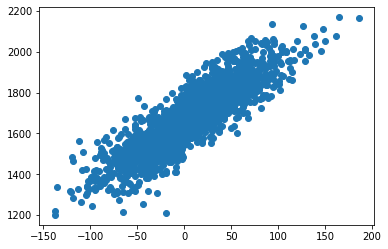

In [142]:
# Home team results
plt.scatter(df_match_fantasy_summary['match_result_home_margin'], df_match_fantasy_summary['SC_Home'])
plt.show()

In [143]:
sc_series = df_match_fantasy_summary['sc_correct?'].value_counts()
af_series = df_match_fantasy_summary['af_correct?'].value_counts()
data_dict = {
    'sc_correct?': sc_series,
    'af_correct?': af_series
}
df_fantasy_accuracy = pd.DataFrame(data_dict).transpose()
df_fantasy_accuracy['Total'] = df_fantasy_accuracy[True] + df_fantasy_accuracy[False] 
df_fantasy_accuracy['% Correct'] = round((df_fantasy_accuracy[True] / df_fantasy_accuracy['Total']) * 100, 2)
df_fantasy_accuracy

,True,False,Total,% Correct
sc_correct?,1783,254,2037,87.53
af_correct?,1607,430,2037,78.89


### Supercoach is the most accurate measure of indicating wins

In [144]:
from sklearn import linear_model
from sklearn import model_selection

X = df_match_fantasy_summary['SC_Home']
X = np.array(X).reshape(-1, 1)
y = df_match_fantasy_summary['match_result_home_margin']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.30)

clr = linear_model.LinearRegression()

cv_result = model_selection.cross_val_score(estimator=clr
                                , X=X_train
                                , y=y_train
                                , cv=50
                                , scoring="neg_mean_squared_error"
                                )

cv_result.mean()

-477.2928829613289

In [145]:
from sklearn import metrics

clr.fit(X_train, y_train)
pred = clr.predict(X_test)
sc_mse = metrics.mean_squared_error(pred, y_test)

In [146]:
from sklearn import linear_model
from sklearn import model_selection

X = df_match_fantasy_summary['AF_Home']
X = np.array(X).reshape(-1, 1)
y = df_match_fantasy_summary['match_result_home_margin']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.30)

clr = linear_model.LinearRegression()

cv_result = model_selection.cross_val_score(estimator=clr
                                , X=X_train
                                , y=y_train
                                , cv=50
                                , scoring="neg_mean_squared_error"
                                )

cv_result.mean()

-1103.3213602081817

In [147]:
from sklearn import metrics

clr.fit(X_train, y_train)
pred = clr.predict(X_test)
af_mse = metrics.mean_squared_error(pred, y_test)

In [148]:
{
    "Supercoach Mean Squared Error": round(sc_mse, 1),
    "AFL Fantasy Mean Squared Error": round(af_mse, 1)
}

{'Supercoach Mean Squared Error': 495.0,
 'AFL Fantasy Mean Squared Error': 1054.3}

### Supercoach score is a more reliable indicator of the winning/losing margin

### Supercoach Player Projections

In [149]:
df_footywire_data

,Date,Season,Round,Venue,Player,Team,Opposition,Status,Match_id,CP,UP,ED,DE,CM,GA,MI5,One.Percenters,BO,TOG,K,HB,D,M,G,B,T,HO,GA1,I50,CL,CG,R50,FF,FA,AF,SC,CCL,SCL,SI,MG,TO,ITC,T5
1,2010-03-25,2010,Round 1,MCG,Daniel Connors,Richmond,Carlton,Home,5089,8,15,16,66.7,0,0,0,1,0,69,14,10,24,3,0,0,1,0,0,2,2,4,6,2,0,77,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-25,2010,Round 1,MCG,Daniel Jackson,Richmond,Carlton,Home,5089,11,10,14,60.9,1,0,0,0,0,80,11,12,23,2,0,0,5,0,0,8,5,4,1,2,0,85,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-03-25,2010,Round 1,MCG,Brett Deledio,Richmond,Carlton,Home,5089,7,14,16,76.2,0,0,0,0,0,89,12,9,21,5,1,0,6,0,0,4,3,4,3,1,2,94,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-03-25,2010,Round 1,MCG,Ben Cousins,Richmond,Carlton,Home,5089,9,10,11,57.9,0,1,0,0,0,69,13,6,19,1,1,0,1,0,1,1,2,3,4,1,0,65,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-03-25,2010,Round 1,MCG,Trent Cotchin,Richmond,Carlton,Home,5089,8,10,13,68.4,1,0,0,0,1,77,11,8,19,6,0,0,1,0,0,2,3,3,2,0,2,65,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90416,2019-09-28,2019,Grand Final,MCG,Harrison Himmelberg,GWS,Richmond,Away,9927,3,9,7,58.3,1,0,2,4,0,92,9,3,12,7,1,1,1,2,0,2,0,3,0,1,1,65,51,0.0,0.0,3.0,153.0,4.0,2.0,1.0
90417,2019-09-28,2019,Grand Final,MCG,Samuel Reid,GWS,Richmond,Away,9927,5,6,8,66.7,0,0,0,4,0,96,5,7,12,2,0,0,3,0,0,0,1,2,1,0,0,47,55,0.0,1.0,1.0,97.0,2.0,5.0,0.0
90418,2019-09-28,2019,Grand Final,MCG,Adam Kennedy,GWS,Richmond,Away,9927,4,8,9,81.8,0,0,0,1,0,71,5,6,11,4,0,0,4,0,0,2,1,0,0,1,0,56,55,0.0,1.0,1.0,121.0,0.0,5.0,1.0
90419,2019-09-28,2019,Grand Final,MCG,Shane Mumford,GWS,Richmond,Away,9927,8,2,7,70.0,0,0,0,4,0,75,2,8,10,0,0,0,1,15,0,1,2,2,1,1,0,42,62,1.0,1.0,0.0,0.0,1.0,2.0,0.0


In [150]:
df_player_summary = pd.pivot_table(df_footywire_data, index=['Player'], columns='Season', values='SC', aggfunc=(len, np.mean))
df_player_summary

len                                                       \
Season             2010  2011 2012  2013  2014  2015  2016  2017  2018  2019   
Player                                                                         
Aaron Black         NaN   1.0  3.0  18.0  25.0   3.0   NaN   4.0   3.0   NaN   
Aaron Cornelius     5.0   8.0  8.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   
Aaron Davey        20.0  11.0  8.0  20.0   NaN   NaN   NaN   NaN   NaN   NaN   
Aaron Edwards      14.0  19.0  9.0   9.0   3.0   NaN   NaN   NaN   NaN   NaN   
Aaron Francis       NaN   NaN  NaN   NaN   NaN   NaN   3.0   2.0   5.0  17.0   
...                 ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
Zachary Williams    NaN   NaN  NaN  11.0   8.0  12.0  22.0  23.0   2.0  24.0   
Zaine Cordy         NaN   NaN  NaN   NaN   NaN   2.0   9.0  19.0  18.0  23.0   
Zak Butters         NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  19.0   
Zak Jones           NaN   NaN  NaN   NaN   4.0  11.0  16.0  23.0  19.0  17.0   
Zephaniah Skinner   NaN   1.0  7.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                        mean                                           \
Season                  2010       2011       2012       2013    2014   
Player                                                                  
Aaron Black              NaN  33.000000  49.666667  76.555556  56.680   
Aaron Cornelius    56.000000  48.500000  47.875000  42.000000     NaN   
Aaron Davey        79.250000  68.272727  62.625000  45.200000     NaN   
Aaron Edwards      68.785714  69.473684  68.666667  84.666667  60.000   
Aaron Francis            NaN        NaN        NaN        NaN     NaN   
...                      ...        ...        ...        ...     ...   
Zachary Williams         NaN        NaN        NaN  58.727273  64.875   
Zaine Cordy              NaN        NaN        NaN        NaN     NaN   
Zak Butters              NaN        NaN        NaN        NaN     NaN   
Zak Jones                NaN        NaN        NaN        NaN  34.000   
Zephaniah Skinner        NaN   4.000000  33.428571        NaN     NaN   

                                                                           
Season                  2015       2016       2017       2018        2019  
Player                                                                     
Aaron Black        42.000000        NaN  66.250000  66.333333         NaN  
Aaron Cornelius          NaN        NaN        NaN        NaN         NaN  
Aaron Davey              NaN        NaN        NaN        NaN         NaN  
Aaron Edwards            NaN        NaN        NaN        NaN         NaN  
Aaron Francis            NaN  59.666667  50.000000  80.800000   66.411765  
...                      ...        ...        ...        ...         ...  
Zachary Williams   69.583333  85.727273  91.391304  97.000000  101.625000  
Zaine Cordy        23.000000  47.555556  64.473684  60.500000   51.608696  
Zak Butters              NaN        NaN        NaN        NaN   60.526316  
Zak Jones          44.727273  59.500000  82.521739  78.473684   85.705882  
Zephaniah Skinner        NaN        NaN        NaN        NaN         NaN  

[1473 rows x 20 columns]

In [151]:
# Get rolling averages
def rolling_average(df, window):
    return df.rolling(min_periods=1, window=window).mean().shift(1)

df_footywire_data['rolling 5 round average'] = df_footywire_data.groupby('Player')['SC'].apply(lambda player: rolling_average(player, 5))
df_footywire_data['rolling 3 round average'] = df_footywire_data.groupby('Player')['SC'].apply(lambda player: rolling_average(player, 3))
df_footywire_data['previous sc score'] = df_footywire_data.groupby('Player')['SC'].apply(lambda player: rolling_average(player, 1))
df_footywire_data.loc[df_footywire_data['Player'] == 'Patrick Cripps', ['Season', 'Round', 'Player', 'SC', 'rolling 5 round average', 'rolling 3 round average', 'previous sc score']]

,Season,Round,Player,SC,rolling 5 round average,rolling 3 round average,previous sc score
36267,2014,Round 4,Patrick Cripps,74,NaN,NaN,NaN
36958,2014,Round 5,Patrick Cripps,21,74.000000,74.000000,74.0
43406,2014,Round 23,Patrick Cripps,23,47.500000,47.500000,21.0
44145,2015,Round 1,Patrick Cripps,53,39.333333,39.333333,23.0
44972,2015,Round 3,Patrick Cripps,89,42.750000,32.333333,53.0
...,...,...,...,...,...,...,...
88133,2019,Round 19,Patrick Cripps,152,109.800000,88.666667,73.0
88752,2019,Round 20,Patrick Cripps,78,122.400000,113.333333,152.0
89167,2019,Round 21,Patrick Cripps,134,99.200000,101.000000,78.0
89279,2019,Round 22,Patrick Cripps,85,110.400000,121.333333,134.0


In [152]:
df_footywire_data.groupby('Player')['SC'].count()

Player
Aaron Black           57
Aaron Cornelius       24
Aaron Davey           59
Aaron Edwards         54
Aaron Francis         27
                    ... 
Zachary Williams     102
Zaine Cordy           71
Zak Butters           19
Zak Jones             90
Zephaniah Skinner      8
Name: SC, Length: 1473, dtype: int64

In [153]:
# Get rolling previous team SC scores
renamed_cols = {
    "home_team": "team", 
    "home_team_score": "score",
    "AF_Home": "AF", 
    "SC_Home": "SC", 
    "match_result_home_margin": "margin", 
    "away_team": "team", 
    "away_team_score": "score", 
    "AF_Away": "AF", 
    "SC_Away": "SC", 
    "match_result_away_margin": "margin"
}

home_match_details = df_match_fantasy_summary.loc[:, ['year', 'date', 'venue', 'crowd', 'match_id', 'home_team', 'home_team_score', 'AF_Home', 'SC_Home', 'match_result_home_margin']].rename(columns=renamed_cols)
away_match_details = df_match_fantasy_summary.loc[:, ['year', 'date', 'venue', 'crowd', 'match_id', 'away_team', 'away_team_score', 'AF_Away', 'SC_Away', 'match_result_away_margin']].rename(columns=renamed_cols)
df_matches_by_team = pd.concat([home_match_details, away_match_details]).sort_index().reset_index()
df_matches_by_team['rolling 5 round SC average'] =  df_matches_by_team.groupby('team')['SC'].apply(lambda team: rolling_average(team, 5))
df_matches_by_team.loc[df_matches_by_team['team'] == 'Richmond']

,index,year,date,venue,crowd,match_id,team,score,AF,SC,margin,rolling 5 round SC average
0,0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Richmond,64,1250,1321,-56,NaN
28,14,2010,Sun 4 Apr 4:40pm,MCG,27358,5087,Richmond,48,1289,1316,-72,1321.000000
59,29,2010,Sun 18 Apr 1:10pm,MCG,42594,5070,Richmond,78,1389,1418,-55,1318.500000
122,61,2010,Sun 16 May 1:10pm,MCG,41563,5014,Richmond,86,1516,1659,-3,1351.666667
161,80,2010,Fri 4 Jun 7:40pm,Marvel Stadium,32858,5073,Richmond,59,1275,1406,-38,1428.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
4016,2008,2019,Sun 11 Aug 3:20pm,MCG,51039,9899,Richmond,73,1625,1769,28,1692.400000
4033,2016,2019,Sun 18 Aug 1:10pm,MCG,57415,9907,Richmond,88,1477,1725,6,1697.600000
4053,2026,2019,Sun 25 Aug 3:20pm,MCG,76995,9911,Richmond,82,1422,1667,27,1697.800000
4069,2034,2019,Fri 20 Sep 7:50pm,MCG,94423,9925,Richmond,85,1385,1616,19,1742.600000


In [154]:
# Get home/away status
status_dummies = pd.get_dummies(df_footywire_data['Status'], prefix='Status')
df_footywire_data = df_footywire_data.merge(status_dummies, left_index=True, right_index=True)
df_footywire_data

,Date,Season,Round,Venue,Player,Team,Opposition,Status,Match_id,CP,UP,ED,DE,CM,GA,MI5,One.Percenters,BO,TOG,K,HB,D,M,G,B,T,HO,GA1,I50,CL,CG,R50,FF,FA,AF,SC,CCL,SCL,SI,MG,TO,ITC,T5,rolling 5 round average,rolling 3 round average,previous sc score,Status_Away,Status_Home
1,2010-03-25,2010,Round 1,MCG,Daniel Connors,Richmond,Carlton,Home,5089,8,15,16,66.7,0,0,0,1,0,69,14,10,24,3,0,0,1,0,0,2,2,4,6,2,0,77,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,2010-03-25,2010,Round 1,MCG,Daniel Jackson,Richmond,Carlton,Home,5089,11,10,14,60.9,1,0,0,0,0,80,11,12,23,2,0,0,5,0,0,8,5,4,1,2,0,85,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
3,2010-03-25,2010,Round 1,MCG,Brett Deledio,Richmond,Carlton,Home,5089,7,14,16,76.2,0,0,0,0,0,89,12,9,21,5,1,0,6,0,0,4,3,4,3,1,2,94,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,2010-03-25,2010,Round 1,MCG,Ben Cousins,Richmond,Carlton,Home,5089,9,10,11,57.9,0,1,0,0,0,69,13,6,19,1,1,0,1,0,1,1,2,3,4,1,0,65,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
5,2010-03-25,2010,Round 1,MCG,Trent Cotchin,Richmond,Carlton,Home,5089,8,10,13,68.4,1,0,0,0,1,77,11,8,19,6,0,0,1,0,0,2,3,3,2,0,2,65,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90416,2019-09-28,2019,Grand Final,MCG,Harrison Himmelberg,GWS,Richmond,Away,9927,3,9,7,58.3,1,0,2,4,0,92,9,3,12,7,1,1,1,2,0,2,0,3,0,1,1,65,51,0.0,0.0,3.0,153.0,4.0,2.0,1.0,55.2,57.666667,58.0,1,0
90417,2019-09-28,2019,Grand Final,MCG,Samuel Reid,GWS,Richmond,Away,9927,5,6,8,66.7,0,0,0,4,0,96,5,7,12,2,0,0,3,0,0,0,1,2,1,0,0,47,55,0.0,1.0,1.0,97.0,2.0,5.0,0.0,44.8,45.000000,55.0,1,0
90418,2019-09-28,2019,Grand Final,MCG,Adam Kennedy,GWS,Richmond,Away,9927,4,8,9,81.8,0,0,0,1,0,71,5,6,11,4,0,0,4,0,0,2,1,0,0,1,0,56,55,0.0,1.0,1.0,121.0,0.0,5.0,1.0,62.8,54.000000,53.0,1,0
90419,2019-09-28,2019,Grand Final,MCG,Shane Mumford,GWS,Richmond,Away,9927,8,2,7,70.0,0,0,0,4,0,75,2,8,10,0,0,0,1,15,0,1,2,2,1,1,0,42,62,1.0,1.0,0.0,0.0,1.0,2.0,0.0,72.8,70.666667,53.0,1,0


In [162]:
df_footywire_data.columns

Index(['Date', 'Season', 'Round', 'Venue', 'Player', 'Team', 'Opposition',
       'Status', 'Match_id', 'CP', 'UP', 'ED', 'DE', 'CM', 'GA', 'MI5',
       'One.Percenters', 'BO', 'TOG', 'K', 'HB', 'D', 'M', 'G', 'B', 'T', 'HO',
       'GA1', 'I50', 'CL', 'CG', 'R50', 'FF', 'FA', 'AF', 'SC', 'CCL', 'SCL',
       'SI', 'MG', 'TO', 'ITC', 'T5', 'rolling 5 round average',
       'rolling 3 round average', 'previous sc score', 'Status_Away',
       'Status_Home'],
      dtype='object')

In [181]:
features = [
    'CP', 'UP', 'ED', 'DE', 'CM', 'GA', 'MI5',
       'One.Percenters', 'BO', 'TOG', 'K', 'HB', 'D', 'M', 'G', 'B', 'T', 'HO',
       'GA1', 'I50', 'CL', 'CG', 'R50', 'FF', 'FA',
    'rolling 3 round average', 
    'previous sc score', 
    'Status_Away',
    'Status_Home'
]
target = "SC"
df_footywire_data_clean = df_footywire_data.dropna(subset=features+[target])

X = df_footywire_data_clean.loc[:, features]
y = df_footywire_data_clean[target]

from sklearn import model_selection

# train/test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.30)

In [182]:
from sklearn import ensemble

clr = ensemble.RandomForestClassifier(n_estimators=10)

In [183]:
cv_result = model_selection.cross_validate(estimator=clr
                                , X=X_train
                                , y=y_train
                                , cv=5
                                , scoring=["neg_mean_squared_error"]
                                )
cv_result['test_neg_mean_squared_error'].mean()

C:\Users\richardm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


-449.9672323492665

In [166]:
clr.fit(X_train, y_train)

pred = clr.predict(X_test)

In [184]:
evaluate = pd.DataFrame({
    "actual": y_test,
    "predicted": pred,
    "diff": y_test - pred
})

# evaluate
df_predicted_scores = pd.merge(df_footywire_data_clean, evaluate, left_index=True, right_index=True)
df_predicted_scores
# df_predicted_scores.to_csv('thingy.csv')

,Date,Season,Round,Venue,Player,Team,Opposition,Status,Match_id,CP,UP,ED,DE,CM,GA,MI5,One.Percenters,BO,TOG,K,HB,D,M,G,B,T,HO,GA1,I50,CL,CG,R50,FF,FA,AF,SC,CCL,SCL,SI,MG,TO,ITC,T5,rolling 5 round average,rolling 3 round average,previous sc score,Status_Away,Status_Home,actual,predicted,diff
353,2010-04-01,2010,Round 2,Gabba,Luke Power,Brisbane,Carlton,Home,5081,8,19,20,74.1,0,0,0,1,2,85,14,13,27,10,0,0,5,0,0,3,3,2,3,0,1,115,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.0,132.000000,132.0,0,1,101,19,82
354,2010-04-01,2010,Round 2,Gabba,Travis Johnstone,Brisbane,Carlton,Home,5081,5,21,21,87.5,0,1,0,1,3,82,15,9,24,5,0,1,2,0,1,3,1,1,1,2,0,89,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,97.000000,97.0,0,1,109,44,65
357,2010-04-01,2010,Round 2,Gabba,Andrew Raines,Brisbane,Carlton,Home,5081,2,16,15,71.4,0,1,0,3,2,85,14,7,21,5,0,0,0,0,1,4,1,3,6,0,2,65,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,54.000000,54.0,0,1,66,30,36
359,2010-04-01,2010,Round 2,Gabba,Simon Black,Brisbane,Carlton,Home,5081,7,13,11,55.0,0,0,1,1,0,78,11,9,20,3,1,0,2,0,0,2,3,3,3,1,0,75,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,96.000000,96.0,0,1,79,86,-7
360,2010-04-01,2010,Round 2,Gabba,Daniel Merrett,Brisbane,Carlton,Home,5081,10,7,16,88.9,0,0,0,7,0,98,6,12,18,7,0,0,2,0,0,1,1,4,1,1,3,63,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,45.000000,45.0,0,1,96,58,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90390,2019-09-28,2019,Grand Final,MCG,Jack Riewoldt,Richmond,GWS,Home,9927,6,5,9,69.2,3,1,4,2,1,98,11,2,13,8,5,1,0,0,1,3,0,2,1,1,0,93,107,0.0,0.0,8.0,418.0,1.0,0.0,0.0,71.0,71.333333,42.0,0,1,107,67,40
90392,2019-09-28,2019,Grand Final,MCG,Nathan Broad,Richmond,GWS,Home,9927,2,12,11,84.6,0,0,0,9,0,89,10,3,13,5,0,0,0,0,0,1,0,1,2,0,0,51,64,0.0,0.0,1.0,104.0,1.0,4.0,0.0,41.8,28.666667,25.0,0,1,64,6,58
90399,2019-09-28,2019,Grand Final,MCG,Tim Taranto,GWS,Richmond,Away,9927,15,18,19,63.3,0,0,0,2,0,80,14,16,30,5,0,0,7,0,0,4,5,4,3,3,1,117,143,2.0,3.0,4.0,385.0,6.0,6.0,1.0,101.2,100.333333,109.0,1,0,143,58,85
90401,2019-09-28,2019,Grand Final,MCG,Nick Haynes,GWS,Richmond,Away,9927,4,18,19,79.2,2,0,0,4,4,92,21,3,24,15,0,0,1,0,0,1,1,2,8,1,0,119,118,0.0,1.0,2.0,485.0,4.0,6.0,0.0,94.6,84.000000,118.0,1,0,118,73,45


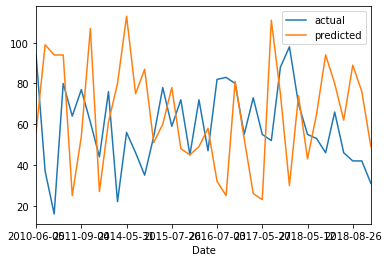

In [198]:
df_predicted_scores = df_predicted_scores.loc[df_predicted_scores['Player'] == 'Neville Jetta']
df_predicted_scores = df_predicted_scores[['Date', 'actual', 'predicted']]
df_predicted_scores = df_predicted_scores.set_index('Date')
lines = df_predicted_scores.plot.line()
# fig, ax = plt.subplots()

# for key, grp in df.groupby(['color']):
#     ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=key, label=key)

# plt.legend(loc='best')
# plt.show()